In [1]:
%load_ext autoreload
%autoreload 2
import sys
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
import time
import numpy as np
import glob
import re
import random
import torch

sys.path.insert(0, '/Data/user/panhailin/git_lab/npspy')
import npspy as nps
from npspy import npsc

In [2]:
sim = 'sim4'

In [3]:
for iteration in range(1,4):
    npsc.clean_ref_obj_by_ae_and_save(
        obj=f'../../03.results/simulation/{sim}/{sim}.pkl',
        fit_name=f'{sim}_iter{iteration}',
        output_save_dir=f'../../03.results/simulation/{sim}/iter{iteration}',
        save_reconstruction=False,
        max_iteration=iteration,
        epochs=20,
    )

Iteration 1/1 for training ShapeAwareAutoencoder...
Model ShapeAwareAutoencoder has total parameter number: 1.02 M
Epoch   0 / 20 train_loss: 0.016262 | val_loss: 0.003583 | lr: 0.001
Epoch   1 / 20 train_loss: 0.001676 | val_loss: 0.002670 | lr: 0.001
Epoch   2 / 20 train_loss: 0.001614 | val_loss: 0.001975 | lr: 0.001
Epoch   3 / 20 train_loss: 0.001314 | val_loss: 0.001537 | lr: 0.001
Epoch   4 / 20 train_loss: 0.001089 | val_loss: 0.001200 | lr: 0.001
Epoch   5 / 20 train_loss: 0.001031 | val_loss: 0.002670 | lr: 0.001
Epoch   6 / 20 train_loss: 0.000933 | val_loss: 0.001714 | lr: 0.001
Epoch   7 / 20 train_loss: 0.000831 | val_loss: 0.000747 | lr: 0.001
Epoch   8 / 20 train_loss: 0.000868 | val_loss: 0.000970 | lr: 0.001
Epoch   9 / 20 train_loss: 0.000774 | val_loss: 0.002236 | lr: 0.001
Epoch  10 / 20 train_loss: 0.000686 | val_loss: 0.000594 | lr: 0.001
Epoch  11 / 20 train_loss: 0.000718 | val_loss: 0.000967 | lr: 0.001
Epoch  12 / 20 train_loss: 0.000737 | val_loss: 0.000683 

In [4]:
cm_dfs_dict = {}
for iteration in range(1,4):
    cm_df = npsc.get_cm_from_errors_for_sim(f'../../03.results/simulation/{sim}/iter{iteration}/{sim}_iter{iteration}_error.csv')
    cm_dfs_dict[iteration] = cm_df
cm_dfs_dict

{1: pred    target  noise
 true                 
 target   16000   2000
 noise     2000      0,
 2: pred    target  noise
 true                 
 target   17906     94
 noise       94   1906,
 3: pred    target  noise
 true                 
 target   17929     71
 noise       71   1929}

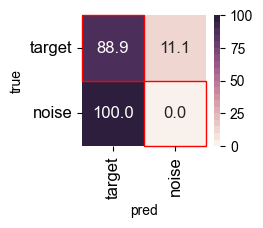

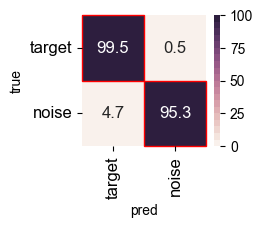

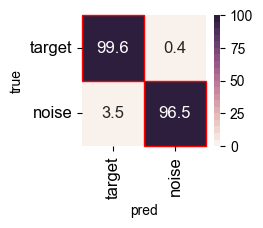

In [5]:
for iteration, cm_df in cm_dfs_dict.items():
    nps.ml.plot_cm(cm_df, figsize=(2, 1.7), annot_size=12.0)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.savefig(f"../../05.figures/simulation/{sim}/{sim}_iter{iteration}_cm.pdf", bbox_inches='tight')

In [6]:
metrics_dfs = []
for iteration in range(1,4):
    metrics_df = npsc.get_metrics_from_errors_for_sim(f'../../03.results/simulation/{sim}/iter{iteration}/{sim}_iter{iteration}_error.csv')
    metrics_df.index = [f'iter{iteration}']
    metrics_dfs.append(metrics_df)
metrics_dfs = pd.concat(metrics_dfs)
metrics_dfs

,accuracy,precision,recall,f1_score,jaccard_score
iter1,0.8000,0.444444,0.444444,0.444444,0.400000
iter2,0.9906,0.973889,0.973889,0.973889,0.949915
iter3,0.9929,0.980278,0.980278,0.980278,0.961788


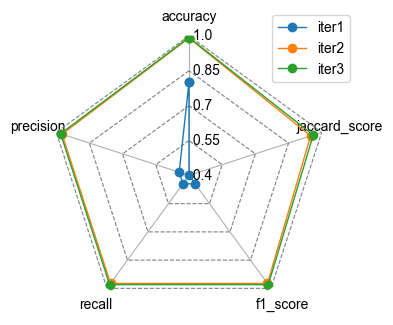

In [7]:
npsc.draw_radar_plot(metrics_dfs, y_min=0.4, legned_ncol=1, figsize=(4,4), y_tick_num=4)
plt.savefig(f'../../05.figures/simulation/{sim}/{sim}_radar_plot.pdf', bbox_inches='tight')